In [1]:
from pickle import dump, load
import pandas as pd
import numpy as np
from collections import Counter
from math import sqrt

In [2]:
df = load(open('/afs/cs.wisc.edu/u/l/e/leng/private/STAT628-M3/NER/results/business&item_cleaned', 'rb'))
df.head(3)

,business_id,stars,text,product,food_phrase
0,Dv6RfXLYe1atjgz3Xf4GGw,4.0,"Good food, reasonably priced, and nice staff. ...",[],[sweet potato fries]
1,AY1SyySRyTnBwBdf7qfGxQ,5.0,"From the second you walk in the door, you're g...",[],"[everything bagel, snack]"
2,Dv6RfXLYe1atjgz3Xf4GGw,4.0,Super lunch option\nWatch out for the yoga mat...,[],[green lemonade]


In [3]:
business = list(set(df['business_id'].tolist()))
len(business)

245

In [4]:
r_df = pd.DataFrame(columns = ['business_id', 'item', 'ave_star'])

for b in business:
    df_ = df[df['business_id'] == b]
    prod = df_['product'].tolist()
    phrase = df['food_phrase'].tolist()
    stars = df['stars'].tolist()
    menu = {}
    for i in range(df_.shape[0]):
        if len(prod[i]) > 0:
            for p in prod[i]:
                if p in list(menu.keys()):
                    menu[p].append(stars[i])
                else:
                    menu[p] = [stars[i]]
        if len(phrase[i]) > 0:
            for p in phrase[i]:
                if p in list(menu.keys()):
                    menu[p].append(stars[i])
                else:
                    menu[p] = [stars[i]]
    
    menu_items = list(menu.keys())
    item_star = [np.mean(menu[j]) for j in menu_items]
    recommend = pd.DataFrame({'item': menu_items, 'ave_star': item_star})
    recommend = recommend[recommend['ave_star'] >= 4]
    recommend['business_id'] = [b]*recommend.shape[0]
    
    r_df = pd.concat([r_df, recommend])
    
r_df

/tmp/ipykernel_3120654/1404205445.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  r_df = pd.concat([r_df, recommend])


,business_id,item,ave_star
0,cFtVkdtHZuZvCNvkSG-RAg,sweet potato fries,4.0
1,cFtVkdtHZuZvCNvkSG-RAg,everything bagel,5.0
2,cFtVkdtHZuZvCNvkSG-RAg,snack,5.0
4,cFtVkdtHZuZvCNvkSG-RAg,butter,4.0
5,cFtVkdtHZuZvCNvkSG-RAg,waffle,4.0
...,...,...,...
10,T9sdnqG0AnXv5xkVy7b4RQ,pizza,4.0
11,T9sdnqG0AnXv5xkVy7b4RQ,ginger,4.0
12,T9sdnqG0AnXv5xkVy7b4RQ,buns,4.0
13,T9sdnqG0AnXv5xkVy7b4RQ,spices,4.0


In [5]:
len(list(set(r_df['business_id'].tolist())))

245

In [6]:
with open('/afs/cs.wisc.edu/u/l/e/leng/private/STAT628-M3/recommend_df','wb') as filepath: 
    dump(r_df, filepath)  

#### post-processing

In [7]:
recm = load(open('/afs/cs.wisc.edu/u/l/e/leng/private/STAT628-M3/recommend_df', 'rb'))

rest = pd.read_csv('/afs/cs.wisc.edu/u/l/e/leng/private/STAT628-M3/preprocess/Philadelphia_Veg_data.csv')
rest

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,bTve2mwLk5Zc01vRKqc2KQ,Red Hook Coffee & Tea,765 S 4th St,Philadelphia,PA,19147,39.938552,-75.149636,4.5,183,1,"{'BikeParking': 'True', 'OutdoorSeating': 'Tru...","Restaurants, Breakfast & Brunch, Vegan, Bagels...","{'Monday': '7:0-18:0', 'Tuesday': '7:0-18:0', ..."
1,JomDoQafikclSVVCPkWjnA,Cedar Park Cafe,4914 Baltimore Ave,Philadelphia,PA,19143,39.947960,-75.221980,4.0,301,1,"{'WiFi': ""u'no'"", 'OutdoorSeating': 'False', '...","Diners, Restaurants, Sandwiches, Breakfast & B...","{'Monday': '7:0-15:0', 'Tuesday': '7:0-15:0', ..."
2,IgNDlyLERBwFGphgcC5VDQ,Cosi,1128 Walnut St,Philadelphia,PA,19107,39.948751,-75.160449,2.5,63,0,"{'OutdoorSeating': 'True', 'RestaurantsPriceRa...","Sandwiches, Vegetarian, Pizza, Food, Coffee & ...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ..."
3,KAZ2Z3831eb5lHtUDKa8kA,Saladworks,"2955 Market St, Ste 221",Philadelphia,PA,19104,39.955750,-75.181989,3.5,8,1,"{'GoodForKids': 'True', 'WiFi': ""'no'"", 'Resta...","Salad, Restaurants, American (Traditional), Fo...","{'Monday': '10:0-17:30', 'Tuesday': '10:0-19:3..."
4,AY1SyySRyTnBwBdf7qfGxQ,Citi Market place,1318 Walnut St,Philadelphia,PA,19107,39.948910,-75.163016,4.5,86,0,"{'HasTV': 'False', 'GoodForKids': 'True', 'Res...","Grocery, Vegan, Food, Vegetarian, Convenience ...","{'Monday': '7:0-21:0', 'Tuesday': '7:0-21:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,_pHMElutAeebkqmYYNeI6w,Herban Quality Eats,3601 Market St,Philadelphia,PA,19104,39.956737,-75.195262,4.5,87,0,"{'Alcohol': ""'none'"", 'BikeParking': 'True', '...","Food Delivery Services, Restaurants, Salad, Br...","{'Monday': '11:0-15:0', 'Tuesday': '9:0-19:0',..."
273,2CDI713ATuxHfnB5b-sBdw,Vedge,1221 Locust St,Philadelphia,PA,19107,39.947931,-75.161428,4.5,1447,1,"{'Caters': 'False', 'WiFi': ""u'no'"", 'GoodForK...","Restaurants, Vegetarian, Beer, Wine & Spirits,...","{'Monday': '0:0-0:0', 'Tuesday': '17:0-22:0', ..."
274,65m_3aPnCbDjm8nOd5TrQA,Loving Hut,742 South St,Philadelphia,PA,19147,39.942318,-75.155262,4.0,32,0,"{'RestaurantsTakeOut': 'True', 'GoodForKids': ...","Internet Cafes, Vegan, Coffee & Tea, Restauran...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
275,xWxn5wmpSNUVKvyTuVdVJg,Beefsteak,3417 Spruce St,Philadelphia,PA,19104,39.950937,-75.194303,4.0,27,0,"{'GoodForMeal': ""{'dessert': False, 'latenight...","Restaurants, American (New), Vegetarian, Sandw...","{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'..."


In [8]:
business = list(set(recm['business_id'].tolist()))

idx = []
name = []
rest_stars = []
r_count = []
postal = []
for b in business:
    df2 = recm[recm['business_id'] == b]
    idx += [b]*df2.shape[0]
    name += [rest[rest['business_id'] == b].iloc[0, 1]]*df2.shape[0]
    rest_stars += [rest[rest['business_id'] == b].iloc[0, 8]]*df2.shape[0]
    r_count += [rest[rest['business_id'] == b].iloc[0, 9]]*df2.shape[0]
    postal += [rest[rest['business_id'] == b].iloc[0, 5]]*df2.shape[0]

In [9]:
df1 = pd.DataFrame({'business_id': idx, 'name': name, 'rest_stars': rest_stars, 'review_count': r_count, 'postal_code': postal})
df1

,business_id,name,rest_stars,review_count,postal_code
0,cFtVkdtHZuZvCNvkSG-RAg,Kurry Shack Francisville,4.0,13,19130
1,cFtVkdtHZuZvCNvkSG-RAg,Kurry Shack Francisville,4.0,13,19130
2,cFtVkdtHZuZvCNvkSG-RAg,Kurry Shack Francisville,4.0,13,19130
3,cFtVkdtHZuZvCNvkSG-RAg,Kurry Shack Francisville,4.0,13,19130
4,cFtVkdtHZuZvCNvkSG-RAg,Kurry Shack Francisville,4.0,13,19130
...,...,...,...,...,...
10243,T9sdnqG0AnXv5xkVy7b4RQ,Point of Destination Cafe,3.5,17,19119
10244,T9sdnqG0AnXv5xkVy7b4RQ,Point of Destination Cafe,3.5,17,19119
10245,T9sdnqG0AnXv5xkVy7b4RQ,Point of Destination Cafe,3.5,17,19119
10246,T9sdnqG0AnXv5xkVy7b4RQ,Point of Destination Cafe,3.5,17,19119


In [10]:
recm = recm.sort_values(by = 'business_id')
recm

,business_id,item,ave_star
4,-6nQZ-QCkAyNHdtaxOxDpQ,butter,4.0
6,-6nQZ-QCkAyNHdtaxOxDpQ,hash browns,4.0
8,-6nQZ-QCkAyNHdtaxOxDpQ,curry tofu wrap,5.0
9,-6nQZ-QCkAyNHdtaxOxDpQ,crust,4.0
10,-6nQZ-QCkAyNHdtaxOxDpQ,pizza,4.5
...,...,...,...
13,yfRWuLFs-mp9GbG82yyeTQ,spices,4.0
12,yfRWuLFs-mp9GbG82yyeTQ,buns,4.0
11,yfRWuLFs-mp9GbG82yyeTQ,ginger,4.0
2,yfRWuLFs-mp9GbG82yyeTQ,snack,5.0


In [11]:
df1 = df1.sort_values(by = 'business_id')
df1

,business_id,name,rest_stars,review_count,postal_code
7755,-6nQZ-QCkAyNHdtaxOxDpQ,Bimini Juice Bar & Salad Bar,4.0,79,19123
7764,-6nQZ-QCkAyNHdtaxOxDpQ,Bimini Juice Bar & Salad Bar,4.0,79,19123
7763,-6nQZ-QCkAyNHdtaxOxDpQ,Bimini Juice Bar & Salad Bar,4.0,79,19123
7762,-6nQZ-QCkAyNHdtaxOxDpQ,Bimini Juice Bar & Salad Bar,4.0,79,19123
7761,-6nQZ-QCkAyNHdtaxOxDpQ,Bimini Juice Bar & Salad Bar,4.0,79,19123
...,...,...,...,...,...
787,yfRWuLFs-mp9GbG82yyeTQ,Pita Pit,3.5,63,19103
788,yfRWuLFs-mp9GbG82yyeTQ,Pita Pit,3.5,63,19103
778,yfRWuLFs-mp9GbG82yyeTQ,Pita Pit,3.5,63,19103
779,yfRWuLFs-mp9GbG82yyeTQ,Pita Pit,3.5,63,19103


In [12]:
df1['item'] = recm['item'].tolist()
df1['item_ave_star'] = recm['ave_star'].tolist()

df1

,business_id,name,rest_stars,review_count,postal_code,item,item_ave_star
7755,-6nQZ-QCkAyNHdtaxOxDpQ,Bimini Juice Bar & Salad Bar,4.0,79,19123,butter,4.0
7764,-6nQZ-QCkAyNHdtaxOxDpQ,Bimini Juice Bar & Salad Bar,4.0,79,19123,hash browns,4.0
7763,-6nQZ-QCkAyNHdtaxOxDpQ,Bimini Juice Bar & Salad Bar,4.0,79,19123,curry tofu wrap,5.0
7762,-6nQZ-QCkAyNHdtaxOxDpQ,Bimini Juice Bar & Salad Bar,4.0,79,19123,crust,4.0
7761,-6nQZ-QCkAyNHdtaxOxDpQ,Bimini Juice Bar & Salad Bar,4.0,79,19123,pizza,4.5
...,...,...,...,...,...,...,...
787,yfRWuLFs-mp9GbG82yyeTQ,Pita Pit,3.5,63,19103,spices,4.0
788,yfRWuLFs-mp9GbG82yyeTQ,Pita Pit,3.5,63,19103,buns,4.0
778,yfRWuLFs-mp9GbG82yyeTQ,Pita Pit,3.5,63,19103,ginger,4.0
779,yfRWuLFs-mp9GbG82yyeTQ,Pita Pit,3.5,63,19103,snack,5.0


In [13]:
df1.to_csv('rest&item_rcmd.csv', index = False)

#### Common items acorss restaurants
For Shiny-app recommendation and general suggestions.

In [22]:
c = Counter(df1['item'].tolist())
c.most_common()[:123]

[('hash browns', 245),
 ('snack', 245),
 ('everything bagel', 245),
 ('butter', 244),
 ('curry tofu wrap', 244),
 ('waffle', 243),
 ('ginger', 236),
 ('spices', 233),
 ('rice', 222),
 ('pizza', 210),
 ('coffee', 189),
 ('buns', 183),
 ('jam', 178),
 ('udon noodle salad', 169),
 ('milkshake', 161),
 ('fake meat', 158),
 ('crust', 144),
 ('honey', 143),
 ('dessert', 140),
 ('appetizer', 139),
 ('roll', 133),
 ('vegpizza', 123),
 ('spring roll', 120),
 ('fries', 113),
 ('sweet potato fries', 110),
 ('meat substitutes', 110),
 ('sweet potato', 110),
 ('curry', 109),
 ('tomato', 106),
 ('pickle', 106),
 ('guacamole', 106),
 ('sour cream', 106),
 ('lime', 106),
 ('dairy', 105),
 ('soy milk', 104),
 ('banana', 100),
 ('Caesar salad', 100),
 ('powdered sugar', 98),
 ('syrup', 98),
 ('green lemonade', 96),
 ('spinach salad', 96),
 ('soy cheese', 96),
 ('lettuce', 95),
 ('bagel', 89),
 ('potato salad', 89),
 ('cream cheese', 86),
 ('ice cream', 86),
 ('basmati rice', 83),
 ('taco salad', 82),
 (

In [23]:
common_item = [i[0] for i in c.most_common()[:123]]
item_star = []
item_std = []

for i in common_item:
    item_star.append(np.mean(df1[df1['item'] == i]['item_ave_star'].tolist()))
    item_std.append(sqrt(np.var(df1[df1['item'] == i]['item_ave_star'].tolist())))
    
item_df = pd.DataFrame({'item': common_item, 'ave_star': item_star, 'std_star': item_std})
item_df = item_df.sort_values(by = ['ave_star', 'std_star'], ascending = [False, True])
item_df

,item,ave_star,std_star
1,snack,5.0,0.0
2,everything bagel,5.0,0.0
40,spinach salad,5.0,0.0
49,creasauce,5.0,0.0
58,beet salad,5.0,0.0
...,...,...,...
83,cheese fries,4.0,0.0
94,carrot,4.0,0.0
102,milk,4.0,0.0
103,frozen yogurt,4.0,0.0


In [24]:
good_item = item_df[item_df['ave_star'] >= 4.5]['item'].tolist()
len(good_item)

48

In [25]:
post = [19147, 19107, 19107, 19103, 19103, 19143, 19130, 19106, 19146, 19102, 19145, 19125, 19148, 19144, 19119, 19122]
n_rest = [43, 33, 32, 29, 18, 14, 11, 10, 9, 9, 9, 8, 7, 5, 5, 5]
n_item = []
postal_item = []
for p in post:
    here_item = df1[df1['postal_code'] == p]['item'].tolist()
    intersect = list(set(good_item) & set(here_item))
    n_item.append(len(intersect))
    postal_item.append(intersect)
    
shiny_df = pd.DataFrame({'postal_code': post, '#restaurant': n_rest, '#good_item': n_item, 'good_item': postal_item})
shiny_df

,postal_code,#restaurant,#good_item,good_item
0,19147,43,48,"[udon noodle salad, burrito, powdered sugar, d..."
1,19107,33,46,"[udon noodle salad, burrito, powdered sugar, d..."
2,19107,32,46,"[udon noodle salad, burrito, powdered sugar, d..."
3,19103,29,48,"[udon noodle salad, burrito, powdered sugar, d..."
4,19103,18,48,"[udon noodle salad, burrito, powdered sugar, d..."
5,19143,14,42,"[udon noodle salad, burrito, powdered sugar, d..."
6,19130,11,45,"[udon noodle salad, burrito, powdered sugar, d..."
7,19106,10,44,"[udon noodle salad, powdered sugar, dipping sa..."
8,19146,9,41,"[udon noodle salad, burrito, powdered sugar, d..."
9,19102,9,43,"[udon noodle salad, burrito, powdered sugar, d..."


In [26]:
item_df.to_csv('item_df.csv', index = False)
shiny_df.to_csv('shiny_df.csv', index = False)

#### visualization

In [40]:
salad = ['spinach salad', 'beet salad', 'potato salad', 'Caesar salad', 'udon noodle salad', 'taco salad', 'cucumber salad']
meat = ['faux meat', 'fake meat', 'meat substitutes']
drink = ['almond milk', 'coffee', 'soy milk', 'milkshake', 'milk', 'frozen yogurt']

In [33]:
def get_item_score(types):
    r_list = []
    for t in types:
        r_list.append(df1[df1['item'] == t]['item_ave_star'].tolist())
        
    return r_list

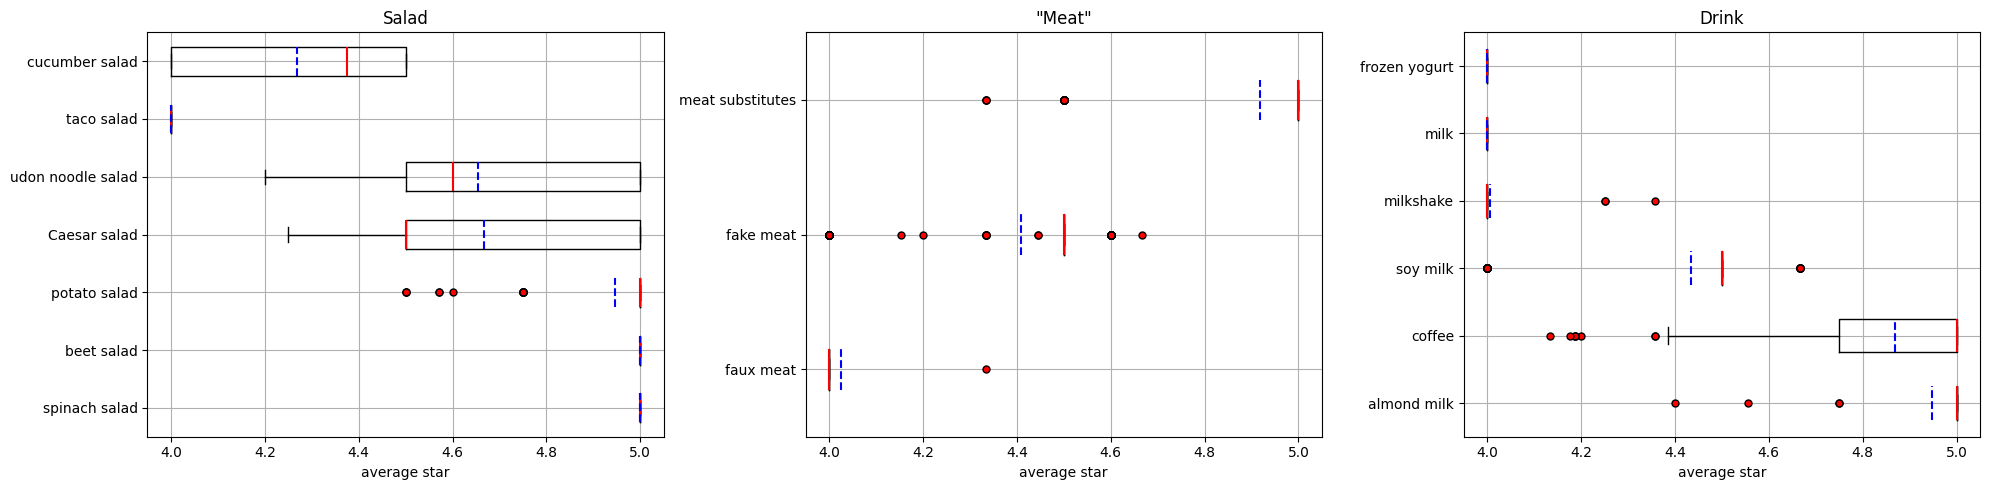

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 5))
      
ax = plt.subplot(131)
ax.grid(True)  
ax.boxplot(get_item_score(salad), medianprops={'color': 'red', 'linewidth': '1.5'},
           meanline=True, showmeans=True, meanprops={'color': 'blue', 'ls': '--', 'linewidth': '1.5'},
           flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 5},
           labels=salad, vert = False)
ax.set_xlabel('average star')
ax.set_title('Salad')
    
ax = plt.subplot(132)
ax.grid(True)  
ax.boxplot(get_item_score(meat), medianprops={'color': 'red', 'linewidth': '1.5'},
           meanline=True, showmeans=True, meanprops={'color': 'blue', 'ls': '--', 'linewidth': '1.5'},
           flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 5},
           labels=meat, vert = False)
ax.set_xlabel('average star')
ax.set_title('"Meat"')
    
ax = plt.subplot(133)
ax.grid(True)  
ax.boxplot(get_item_score(drink), medianprops={'color': 'red', 'linewidth': '1.5'},
           meanline=True, showmeans=True, meanprops={'color': 'blue', 'ls': '--', 'linewidth': '1.5'},
           flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 5},
           labels=drink, vert = False)
ax.set_xlabel('average star')
ax.set_title('Drink')

plt.tight_layout()
plt.show()

In [32]:
get_item_score(drink)

[[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0],
 [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0],
 [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0],
 [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0],
 [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0],
 [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0]]

In [ ]:
vegetables
spices
items